In [2]:
import sys
import warnings
warnings.simplefilter("ignore")

# LIBRERIAS

In [3]:
## Librerías a usar

import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
from scipy.stats import norm


# DATOS

In [4]:
## Cargar la red
base=pd.read_excel("Base-inicial.xlsx")
base

,Organization Name,Headquarters Location,Operating Status,Company Type,Number of Investments,Number of Lead Investments,Number of Diversity Investments,Number of Exits,Number of Lead Investors,Number of Investors,...,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Number of Events,SEMrush - Monthly Visits,SEMrush - Average Visits (6 months),SEMrush - Visit Duration,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD),Principales inversionistas
0,Tencent,"Shenzhen, Guangdong, China",Active,For Profit,693.0,375.0,15.0,125.0,1.0,4.0,...,USD,1.257677e+10,22.0,"4,085,844","3,553,184",600.0,NaN,NaN,NaN,"IDG Capital, Prosus & Naspers, Lippo Group, PCCW"
1,Warburg Pincus,"New York, New York, United States",Active,NaN,433.0,286.0,22.0,131.0,NaN,NaN,...,USD,3.802820e+07,NaN,34.635,"34,033.67",392.0,53801.0,USD,53801.0,NaN
2,Twitter,"San Francisco, California, United States",Active,For Profit,10.0,2.0,1.0,3.0,9.0,37.0,...,USD,4.430192e+09,77.0,"6,026,399,205","3,104,998,131.33",942.0,NaN,NaN,NaN,"Andreessen Horowitz, Morgan Stanley, Spark Cap..."
3,Ubisoft,"Montreuil-sous-bois, Ile-de-France, France",Active,For Profit,9.0,NaN,NaN,1.0,1.0,4.0,...,USD,7.706506e+08,16.0,"32,820,567","27,881,933.83",392.0,NaN,NaN,NaN,"Tencent, JP Morgan Chase, Ontario Teachers' Pe..."
4,WeWork,"New York, New York, United States",Active,For Profit,9.0,6.0,4.0,2.0,11.0,24.0,...,USD,2.159578e+10,120.0,"2,646,155","2,483,475.83",280.0,343977.0,USD,343977.0,"SoftBank, JP Morgan Chase, Goldman Sachs, Insi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,Activation Capital,NaN,Active,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2207,Gavi,"Moritzburg, Sachsen, Germany",Active,For Profit,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4070569.0,USD,4070569.0,NaN
2208,BF Holdings,"Dudley, Dudley, United Kingdom",Closed,For Profit,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2209,GO Virginia,NaN,Active,NaN,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.495,NaN,0.0,NaN,NaN,NaN,NaN


In [5]:
base.dtypes

Organization Name                                       object
Headquarters Location                                   object
Operating Status                                        object
Company Type                                            object
Number of Investments                                  float64
Number of Lead Investments                             float64
Number of Diversity Investments                        float64
Number of Exits                                        float64
Number of Lead Investors                               float64
Number of Investors                                    float64
Industry Groups                                         object
Industries                                              object
Number of Funding Rounds                               float64
Funding Status                                          object
Last Funding Date                               datetime64[ns]
Last Funding Amount                                    

# CREACIÓN DE NODOS Y ARCOS

In [6]:
# Crear los nodos
nodos = base.dropna(subset=['Organization Name', 'Principales inversionistas'])
nodos

,Organization Name,Headquarters Location,Operating Status,Company Type,Number of Investments,Number of Lead Investments,Number of Diversity Investments,Number of Exits,Number of Lead Investors,Number of Investors,...,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Number of Events,SEMrush - Monthly Visits,SEMrush - Average Visits (6 months),SEMrush - Visit Duration,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD),Principales inversionistas
0,Tencent,"Shenzhen, Guangdong, China",Active,For Profit,693.0,375.0,15.0,125.0,1.0,4.0,...,USD,1.257677e+10,22.0,"4,085,844","3,553,184",600.00,NaN,NaN,NaN,"IDG Capital, Prosus & Naspers, Lippo Group, PCCW"
2,Twitter,"San Francisco, California, United States",Active,For Profit,10.0,2.0,1.0,3.0,9.0,37.0,...,USD,4.430192e+09,77.0,"6,026,399,205","3,104,998,131.33",942.00,NaN,NaN,NaN,"Andreessen Horowitz, Morgan Stanley, Spark Cap..."
3,Ubisoft,"Montreuil-sous-bois, Ile-de-France, France",Active,For Profit,9.0,NaN,NaN,1.0,1.0,4.0,...,USD,7.706506e+08,16.0,"32,820,567","27,881,933.83",392.00,NaN,NaN,NaN,"Tencent, JP Morgan Chase, Ontario Teachers' Pe..."
4,WeWork,"New York, New York, United States",Active,For Profit,9.0,6.0,4.0,2.0,11.0,24.0,...,USD,2.159578e+10,120.0,"2,646,155","2,483,475.83",280.00,343977.0,USD,343977.0,"SoftBank, JP Morgan Chase, Goldman Sachs, Insi..."
5,Wagestream,"London, England, United Kingdom",Active,For Profit,1.0,NaN,NaN,NaN,6.0,15.0,...,USD,2.543234e+08,NaN,33.731,"19,865.67",122.00,NaN,NaN,NaN,"Smash Capital, Ascension, BlackRock, QED Inves..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,Baidu,"Beijing, Beijing, China",Active,For Profit,113.0,62.0,3.0,27.0,5.0,10.0,...,USD,2.620000e+07,37.0,"165,824,170","135,372,669.33",976.00,NaN,NaN,NaN,"Google, IDG Capital, Threshold, ePlanet Capita..."
2114,Backstage Capital,"West Hollywood, California, United States",Active,NaN,143.0,24.0,114.0,3.0,NaN,1.0,...,NaN,NaN,1.0,13.025,18.055,546.00,NaN,NaN,NaN,Josef Scarantino
2143,Boost VC,"San Mateo, California, United States",Active,NaN,266.0,25.0,38.0,29.0,NaN,1.0,...,NaN,NaN,3.0,734,"2,610.83",53.00,NaN,NaN,NaN,Mason Ng
2147,ESL Gaming,"Cologne, Nordrhein-Westfalen, Germany",Active,For Profit,1.0,1.0,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Omnes Capital


In [7]:
# Crear los arcos para estos nuevos individuos
sources = [] # lista de origenes
target = [] # lista de destinos

for i in nodos.index:
    texto = nodos["Principales inversionistas"][i]
    conexiones = texto.split(',')
    for j in range(len(conexiones)):
        # Agregar el origen
        target.append(nodos["Organization Name"][i])
        # Agregar el destino
        sources.append(conexiones[j])

In [8]:
# Crear el archivo de arcos

tuplas=list(zip(sources, target))

# Crear un Data Frame a partir de las tuplas
arcos = pd.DataFrame( tuplas, columns =['Source', 'Target'])
arcos

,Source,Target
0,IDG Capital,Tencent
1,Prosus & Naspers,Tencent
2,Lippo Group,Tencent
3,PCCW,Tencent
4,Andreessen Horowitz,Twitter
...,...,...
5071,TA Associates,Bigpoint
5072,Summit Partners,Bigpoint
5073,GMT Capital,Bigpoint
5074,Peacock Equity,Bigpoint


In [9]:
nodos2 = nodos[nodos['Organization Name'].isin(arcos.Source)].drop('Principales inversionistas',axis=1)
nodos2

,Organization Name,Headquarters Location,Operating Status,Company Type,Number of Investments,Number of Lead Investments,Number of Diversity Investments,Number of Exits,Number of Lead Investors,Number of Investors,...,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Number of Events,SEMrush - Monthly Visits,SEMrush - Average Visits (6 months),SEMrush - Visit Duration,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD)
0,Tencent,"Shenzhen, Guangdong, China",Active,For Profit,693.000,375.0,15.0,125.0,1.0,4.0,...,1.257677e+10,USD,1.257677e+10,22.0,"4,085,844","3,553,184",600.0,NaN,NaN,NaN
3,Ubisoft,"Montreuil-sous-bois, Ile-de-France, France",Active,For Profit,9.000,NaN,NaN,1.0,1.0,4.0,...,7.706506e+08,USD,7.706506e+08,16.0,"32,820,567","27,881,933.83",392.0,NaN,NaN,NaN
7,Techstars,"Boulder, Colorado, United States",Active,For Profit,3.569,491.0,795.0,363.0,1.0,11.0,...,1.088000e+08,USD,1.088000e+08,318.0,606.778,"240,410.17",275.0,26964318.0,USD,26964318.0
12,Zomato,"Gurgaon, Haryana, India",Active,For Profit,15.000,13.0,NaN,2.0,12.0,25.0,...,2.100568e+09,USD,2.100568e+09,NaN,"28,528,270","22,805,302",494.0,NaN,NaN,NaN
15,SAP,"Walldorf, Baden-Wurttemberg, Germany",Active,For Profit,29.000,7.0,NaN,14.0,1.0,2.0,...,1.301371e+09,USD,1.301371e+09,239.0,"27,548,849","26,208,156.17",544.0,67473085.0,USD,67473085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,Earlybird Venture Capital,"Berlin, Berlin, Germany",Active,For Profit,281.000,112.0,3.0,44.0,1.0,1.0,...,1.800000e+07,EUR,2.098876e+07,11.0,7.637,"12,045.33",153.0,13241876.0,USD,13241876.0
1966,EquityZen,"New York, New York, United States",Active,For Profit,37.000,2.0,4.0,31.0,1.0,16.0,...,1.130937e+07,USD,1.130937e+07,2.0,373.848,"506,332.33",713.0,246443.0,USD,246443.0
2015,Golub Capital,"San Francisco, California, United States",Active,NaN,31.000,12.0,3.0,14.0,NaN,1.0,...,NaN,NaN,NaN,NaN,15.95,"10,751.5",510.0,NaN,NaN,NaN
2075,ArcTern Ventures,"Toronto, Ontario, Canada",Active,NaN,41.000,13.0,3.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,3.28,NaN,10.0,NaN,NaN,NaN


In [10]:
arcos2 = arcos[arcos.Source.isin(nodos2['Organization Name']) 
               | arcos.Target.isin(nodos2['Organization Name'])]
arcos2

,Source,Target
0,IDG Capital,Tencent
1,Prosus & Naspers,Tencent
2,Lippo Group,Tencent
3,PCCW,Tencent
9,Tencent,Ubisoft
...,...,...
5050,Google,AOL
5055,RBC Generator Fund,ArcTern Ventures
5061,BC Partners,Altice USA
5063,Google,Baidu


In [11]:
nodos2 = nodos2.set_index('Organization Name')

In [12]:
# Construir red
G=nx.DiGraph()
# Nodos
# Agregar los nodos por su identificador
G.add_nodes_from(nodos2.index)
# Agregar los atributos de los nodos
# Primero recorrer los nodos que se agregaron a la red
for nodo in G.nodes:
    # En cada nodo recorremos los atributos de los nodos
    for atr in nodos2:
        # Agregar cada atributo al nodo
        G.nodes[nodo][atr]=nodos2[atr][nodo]
# Arcos
# Agregar los arcos
G.add_edges_from([tuple(x) for x in arcos2[['Source','Target']].to_numpy()])

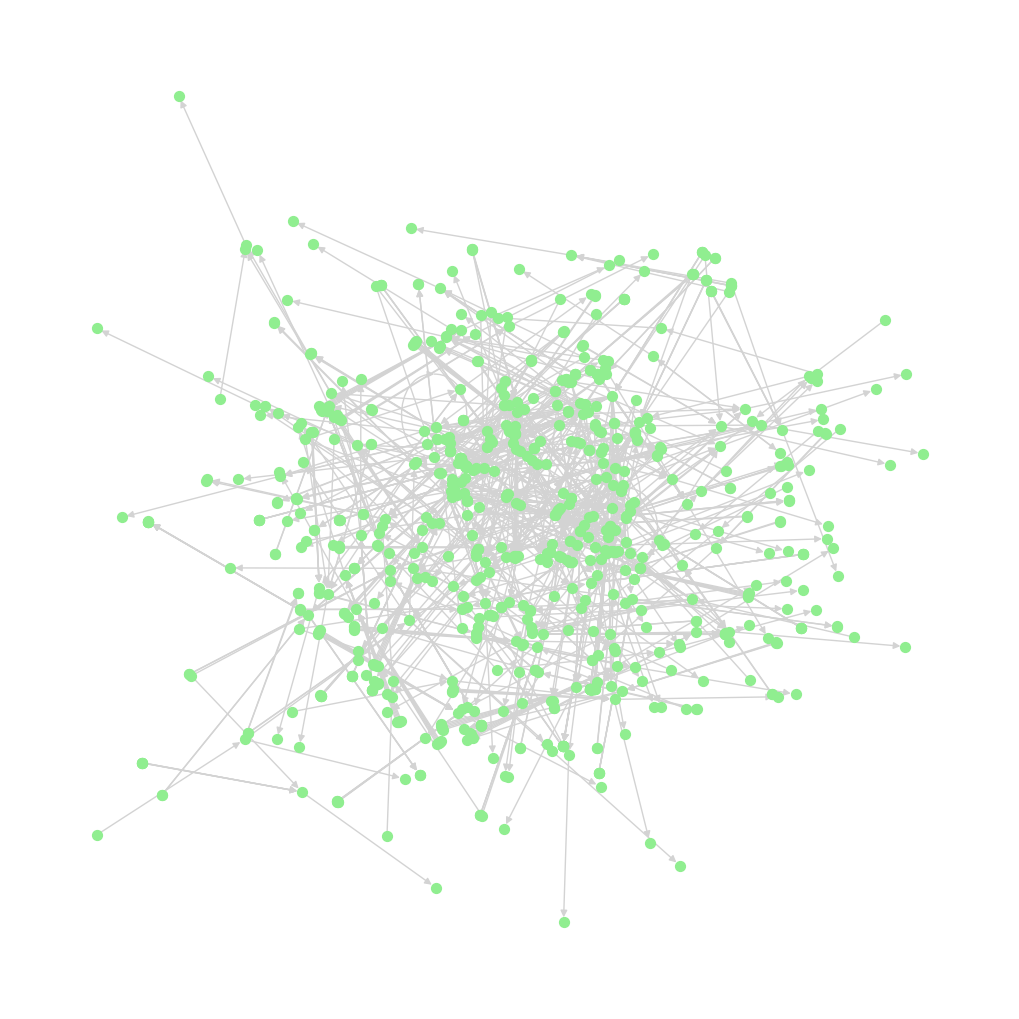

In [13]:
# Lienzo de la gráfica
fig=plt.figure(figsize=(10,10))
# Después se genera el gráfico
nx.draw_kamada_kawai(G, node_size=50, node_color='lightgreen', edge_color='lightgray')
# Por último se muestra la gráfica
plt.show()

# Detección de comunidades

A continuación realizaremos un análisis con algoritmos de detección de comunidades teniendo en cuenta los atributos disponibles de los nodos

In [14]:
#pip install infomap

In [15]:
#pip install python-louvain

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import community
import random
import infomap

In [17]:
from community import community_louvain as community
from networkx.algorithms.community import label_propagation_communities
from networkx.algorithms.community.kernighan_lin import kernighan_lin_bisection

In [18]:
def comunidades(G,opcion):

    if opcion == 1:
        R = nx.to_undirected(G)
        louvain = community.best_partition(R,random_state=10)
        for nodo in R.nodes:
            R.nodes[nodo]['Comunidad']=louvain.get(nodo)
            
    if opcion == 2:
        #R = nx.to_undirected(G)
        R=G
        def most_central_edge(R):
            centrality = nx.edge_betweenness_centrality(R)
            return max(centrality, key=centrality.get)
        
        overlaping = nx.algorithms.community.girvan_newman(R,most_valuable_edge=most_central_edge)
        lista = list(tuple(sorted(c) for c in next(overlaping)))
        nodos = list(R.nodes())
        values = [0]*len(nodos)
            
        #values
        k=0
        for i in nodos:
            for j in range(0,len(lista)):
                if(i in lista[j]):
                    values[k] = j+1
            k+=1
        i=0
        for nodo in R.nodes:
            # Agregamos la comunidad en cada nodo
            R.nodes[nodo]['Comunidad']=values[i]
            i+=1
            
    if opcion == 3:
        
        # Convertir los nodos a tipo entero
        nodos_enteros = {nodo: i for i, nodo in enumerate(G.nodes())}
        G = nx.relabel_nodes(G, nodos_enteros)
        R=G
        #im = infomap.Infomap("--two-level --directed")
        im = infomap.Infomap("--directed")
        # Agrego arcos
        for e in R.edges():
            im.addLink(*e)
        # Ejecutar
        im.run()
        # Obtengo el diccionario con las comunidades
        infoMap = im.get_modules()
        info={}
        for node in im.tree:
            if node.is_leaf:
                info[node.node_id]=node.module_id
        for nodo in R.nodes:
            R.nodes[nodo]['Comunidad']=infoMap.get(nodo)
            
    if opcion==4:
        # Transformar de red dirigida a no dirigida (print(G.is_directed()))
        R= nx.to_undirected(G)
        # Correr el algoritmo
        partition1 = label_propagation_communities(R)
        
        partition3={}
        nom_comunidad=0

        for comunidad in partition1:
            for nodo in comunidad:
                partition3[nodo]=nom_comunidad
            nom_comunidad=nom_comunidad+1
        for nodo in R.nodes:
            R.nodes[nodo]['Comunidad']=partition3.get(nodo)
            

    if opcion==5:
            # Transformar de red dirigida a no dirigida (print(G.is_directed()))
            R=nx.to_undirected(G)
            # Correr el algoritmo
            partition = nx.algorithms.community.greedy_modularity_communities(R)
            diccionario={}
            nom_comunidad=0
            for comunidad in partition:
                for nodo in comunidad:
                    diccionario[nodo]=nom_comunidad
                nom_comunidad=nom_comunidad+1
            for nodo in R.nodes:
                R.nodes[nodo]['Comunidad']=diccionario.get(nodo)
                
    if opcion==6:  #Algoritmo Kernighan-Lin                 
        R= nx.to_undirected(G)

        lista = kernighan_lin_bisection(R, partition=None, max_iter=100, weight='weight', seed=None)
        nodos = list(R.nodes())
        values = [0]*len(nodos)
        #values
        k=0
        for i in nodos:
            for j in range(0,len(lista)):
                if(i in lista[j]):
                    values[k] = j+1
            k+=1
        i=0    
        for nodo in R.nodes:
            # Agregamos la comunidad en cada nodo
            R.nodes[nodo]['Comunidad']=values[i]
            i+=1
            
            
    return R

In [19]:
def graficar_red(R):
    # Definir lienzo
    fig=plt.figure(figsize=(10,10))

    # Guardar posiciones
    pos = nx.kamada_kawai_layout(R)
    Comunidad = [R.nodes[node]['Comunidad'] for node in R.nodes()]

    # Graficar
    nx.draw(R, pos=pos, node_size=10, node_color=Comunidad,edge_color='lightgray')

    # Mostrar gráfica                
    plt.show()

In [20]:
def graficar_red2(R):
    # Definir lienzo
    fig=plt.figure(figsize=(10,10))

    # Guardar posiciones
    pos = nx.spring_layout(R)
    Comunidad = [R.nodes[node]['Comunidad'] for node in R.nodes()]

    # Graficar
    nx.draw(R, pos=pos, node_size=10, node_color=Comunidad,edge_color='lightgray')

    # Mostrar gráfica                
    plt.show()

In [21]:
def lista_comunidades(R):
    Comunidad = [R.nodes[node]['Comunidad'] for node in R.nodes()]
    return Comunidad

## Algoritmo de Louvain

In [22]:
H = comunidades(G,1)

In [23]:
len(set(lista_comunidades(H)))

63

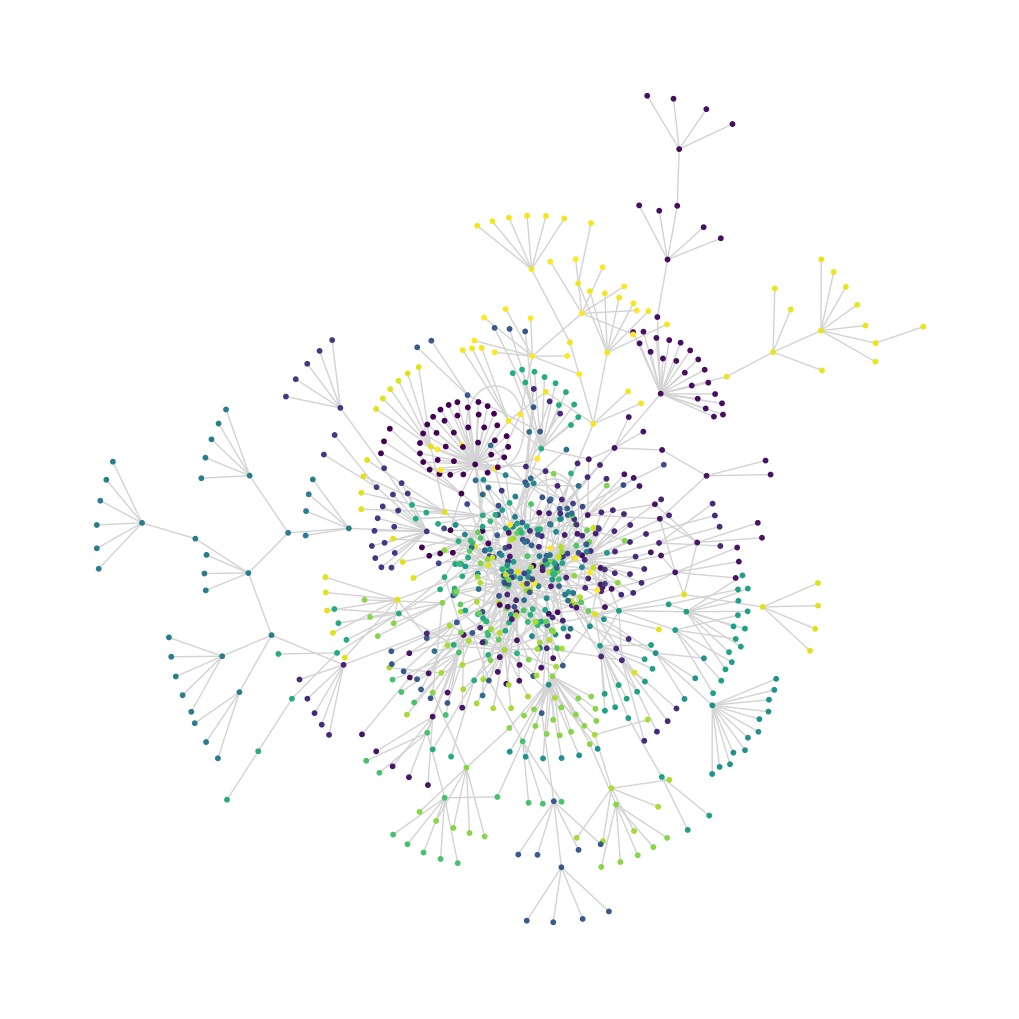

In [24]:
graficar_red(H)

## Algoritmo Girvan-Newman

In [25]:
N = comunidades(G,2)

In [26]:
len(set(lista_comunidades(N)))

49

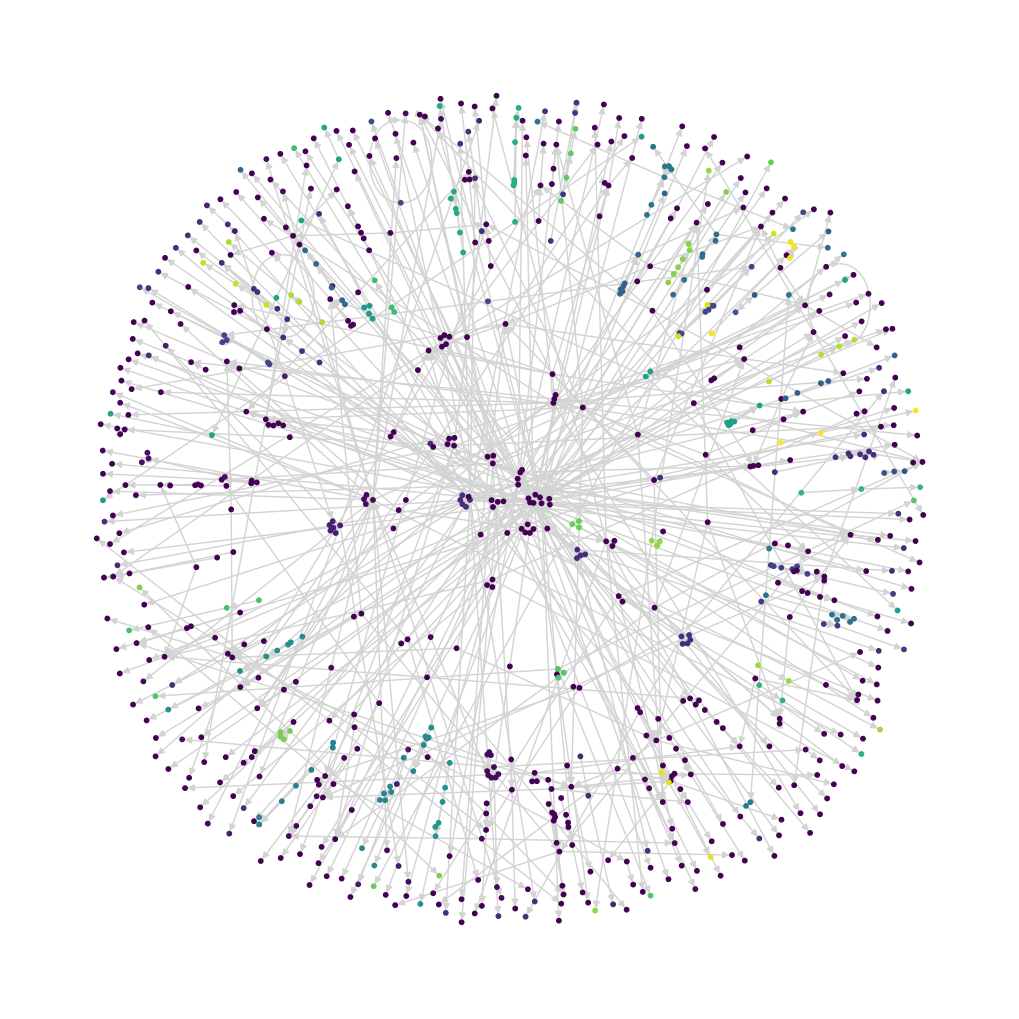

In [27]:
graficar_red2(N)

## Algoritmo Infomap

In [28]:
M = comunidades(G,3)

In [29]:
len(set(lista_comunidades(M)))

71

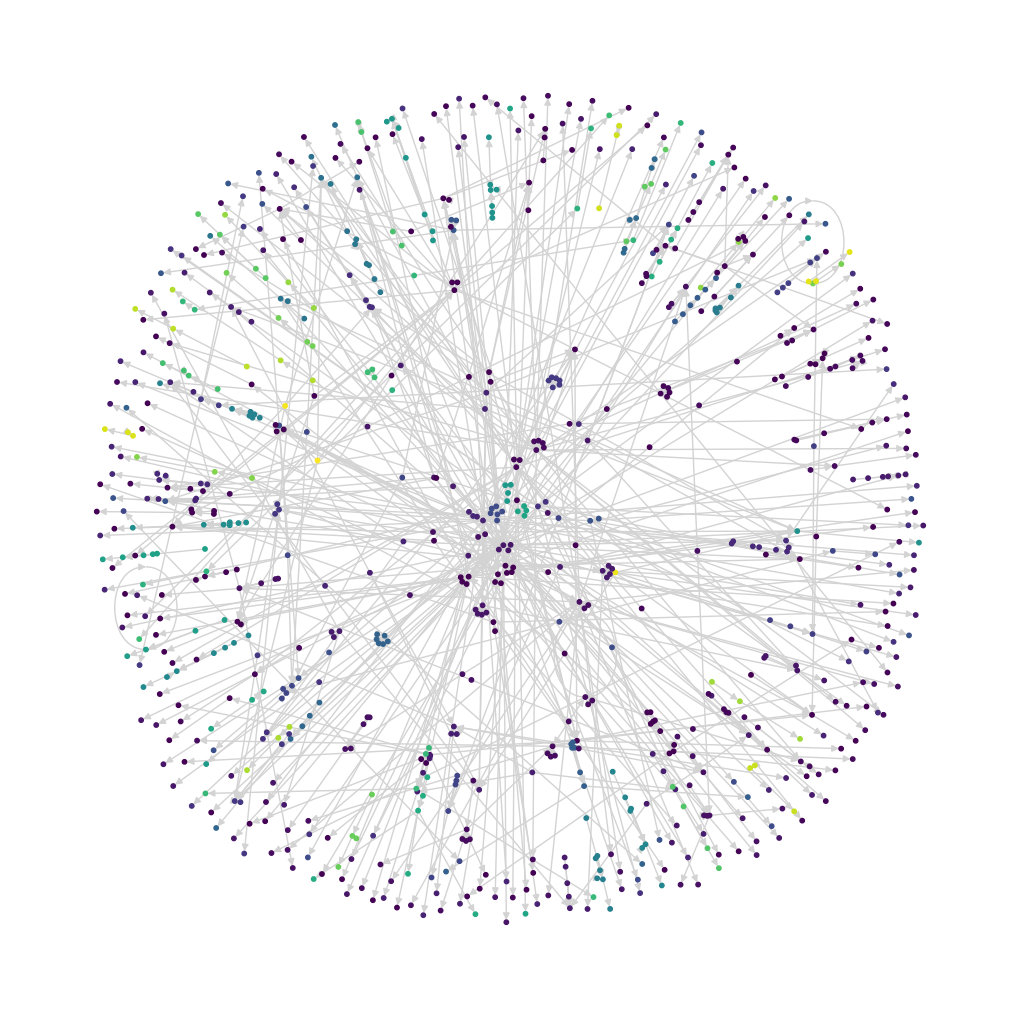

In [30]:
graficar_red2(M)

## Algoritmo  Label propagation

In [47]:
Z = comunidades(G,4)

In [32]:
len(set(lista_comunidades(Z)))

148

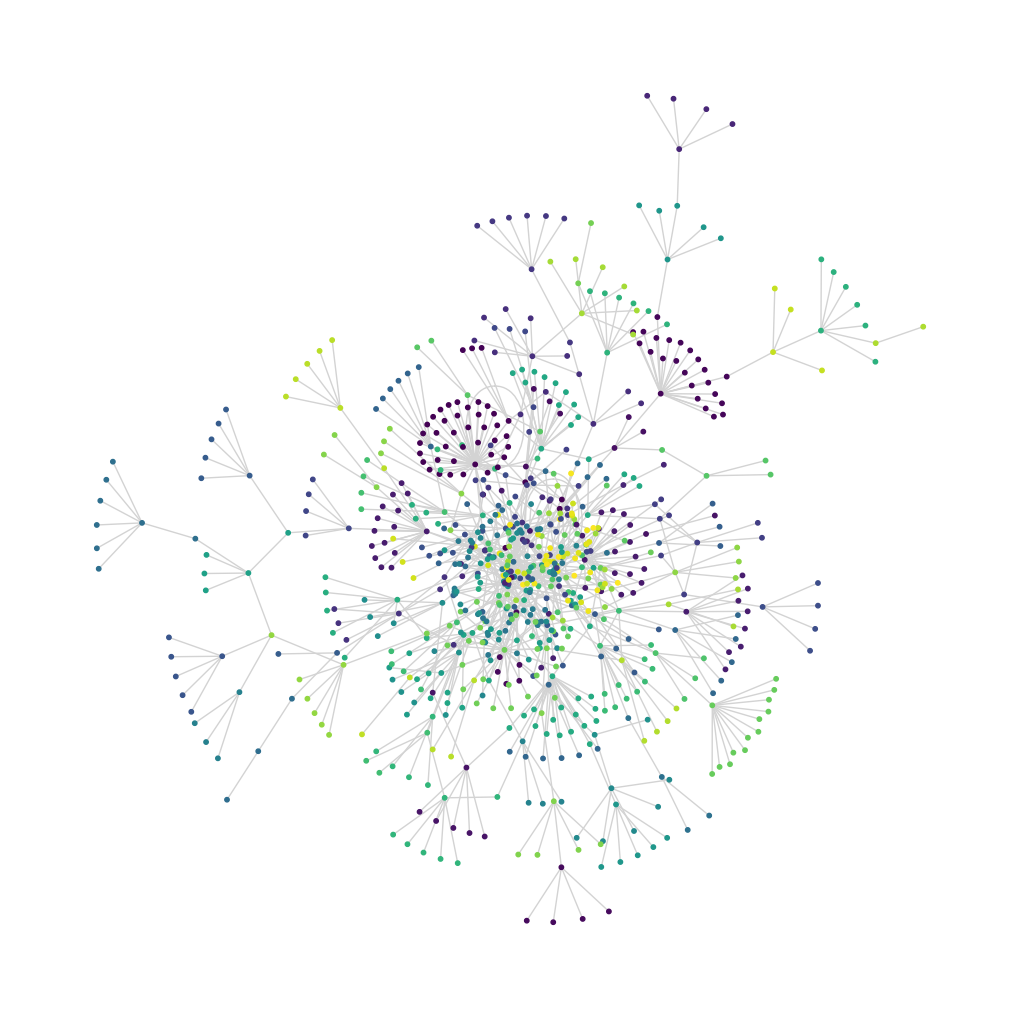

In [33]:
graficar_red(Z)

## Algoritmo Greedy Modularity

In [67]:
X = comunidades(G,5)

In [35]:
len(set(lista_comunidades(X)))

71

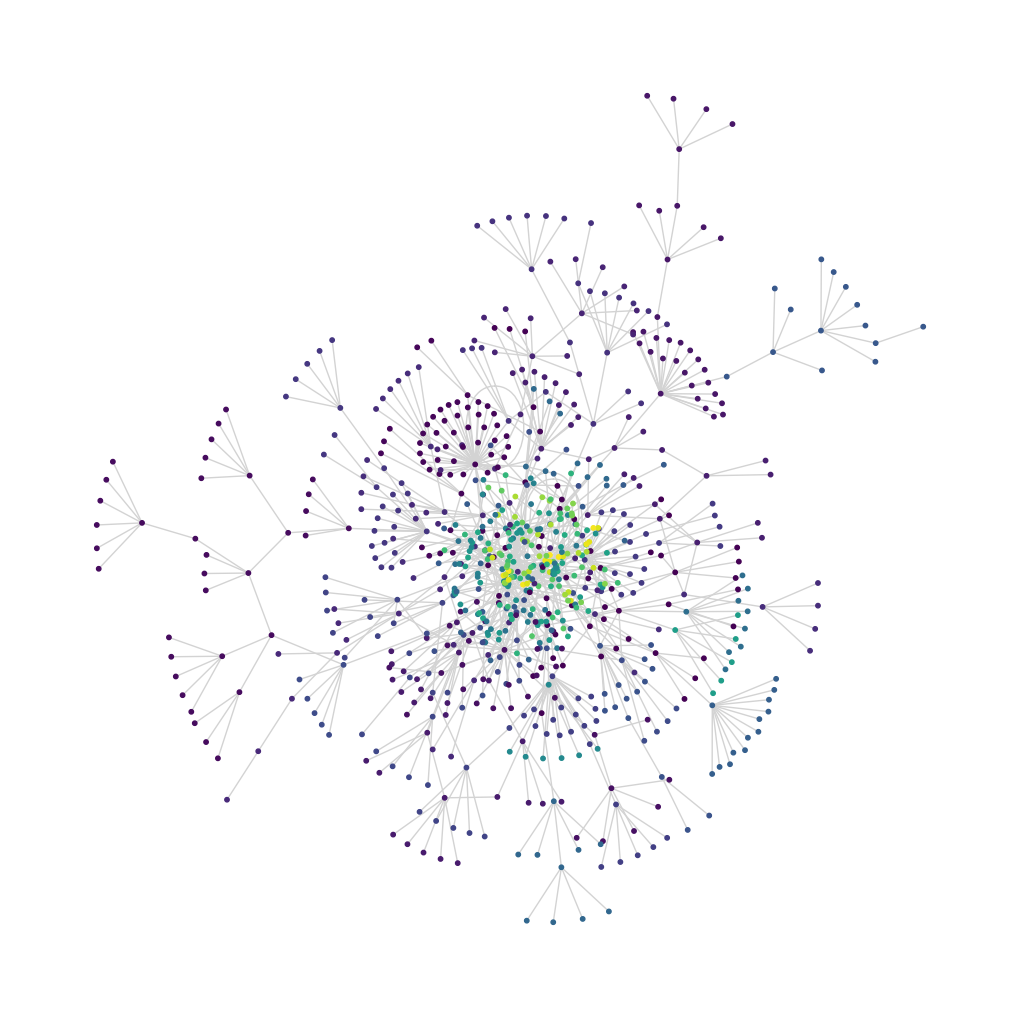

In [36]:
graficar_red(X)

## Algoritmo Kernighan-Lin

In [37]:
Y = comunidades(G,6)

In [38]:
len(set(lista_comunidades(Y)))

2

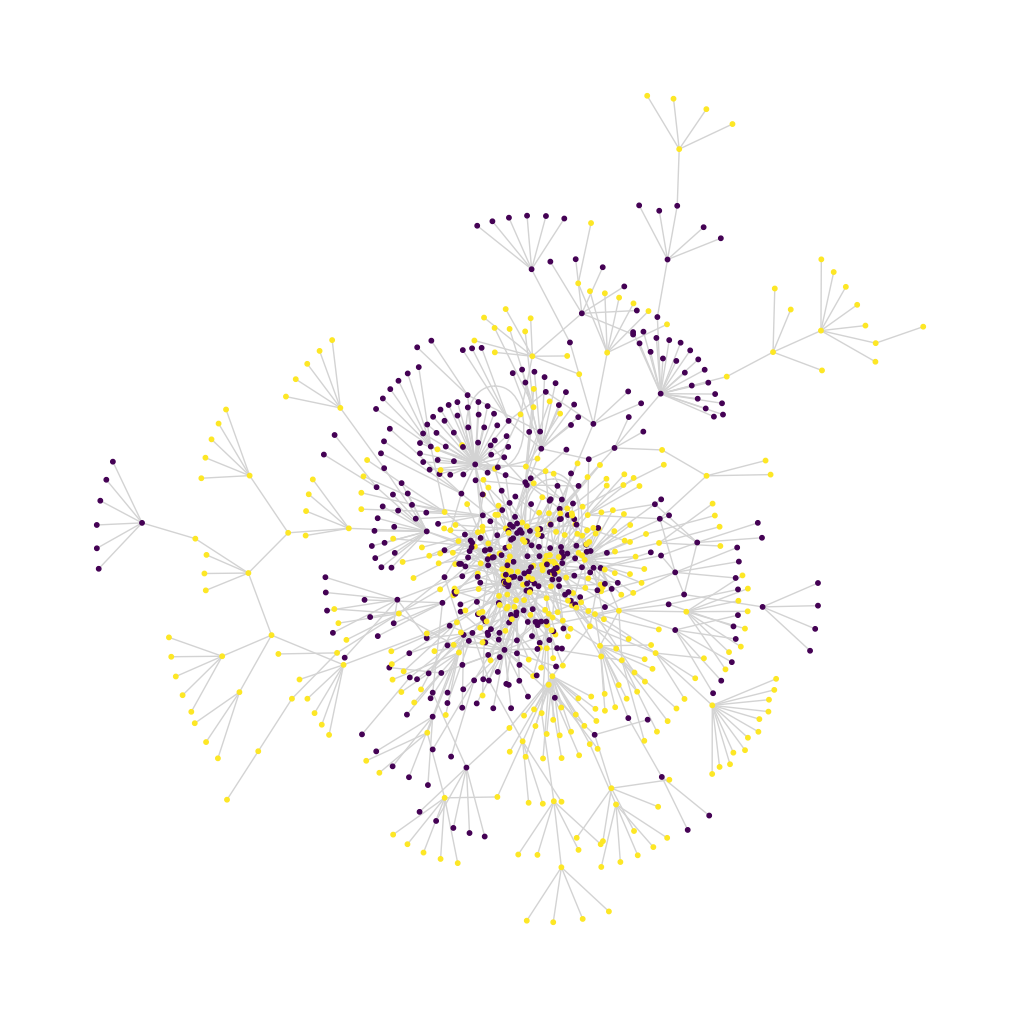

In [39]:
graficar_red(Y)

# Análisis de comunidades

In [40]:
def tabla(G,columna, valor,agregar):
    Comunidades=pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index').reset_index().dropna(thresh=10)
    pivot = Comunidades.pivot_table(index='Comunidad', columns=columna, values=valor, aggfunc=agregar)
    return pivot
def tabla2(G,columna, valor,agregar):
    Comunidades=pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
    pivot = Comunidades.pivot_table(index=columna, columns='Comunidad', values=valor, aggfunc=agregar).fillna(0)
    return pivot

## Justificación y análisis resultados algoritmo Kernighan-Lin

- Justificación: El algoritmo de Kernighan-Lin es un algoritmo "divisivo", que busca eliminar aquellos nodos que se conectan con comunidades muy diferentes, de manera que se aíslen unas comunidades de las otras. Es un algoritmo iterativo que inicia con una partición en dos subgrafos con la misma cantidad de nodos y, en cada iteración, busca un subconjunto de nodos de cada subgrafo de forma que al intercambiarse se maximice la ganancia. El proceso termina cuando la ganancia sea mínima. Si bien es un método lento, es muy útil para establecer puntos de corte adecuados, lo que resulta de especial interés para el caso de estudio.

In [45]:
tabla(Y,"Company Type","Total Funding Amount","sum")

Company Type,For Profit,Non-profit
Comunidad,,
1,7.625432e+11,130000000.0
2,7.584520e+10,172875499.0


En primer lugar, es importante destacar que la inversión recibida en ambas comunidades es, principalmente, proveniente de empresas con ánimo de lucro, lo que tiene sentido desde el punto de vista del objeto social de dichas organizaciones y su búsqueda de beneficios.

In [46]:
tabla(Y,"Operating Status","Total Funding Amount","sum")

Operating Status,Active,Closed
Comunidad,,
1,7.637155e+11,1.300000e+09
2,7.805794e+10,1.543715e+08


Además, siendo un resultado esperable, las organizaciones inversoras están activas en su mayoría. Para la comunidad 2, el 0.57% de la inversión ha sido realizada por organizaciones que ya han cerrado, mientras que todas de las inversoras en la comunidad 1 siguen activas.

In [47]:
tabla(Y,"Funding Status","Total Funding Amount","sum")

Funding Status,Early Stage Venture,IPO,Late Stage Venture,M&A,Private Equity,Seed
Comunidad,,,,,,
1,1.774371e+09,6.966068e+11,5.548631e+09,4.104296e+10,1.052890e+10,61500000.0
2,4.626003e+09,5.617484e+10,2.486485e+09,6.495130e+09,3.900577e+09,270700000.0


Una última comparación se realiza en torno al estado de financiación de la empresa. En este caso, como en los anteriores, no hay muchas diferencias en los resultados obtenidos para cada una de las comunidades. las IPO (Oferta Pública de Venta) suponen la mayor fuente de financiación, agrupando casi el 94% de inversiones en la comunidad 1 y algo más del 83% de las inversiones para la comunidad 2. Una diferencia importante se puede encontrar en la inversión en deuda privada, que representa casi un 13% del total de inversiones realizadas por las organizaciones de la comunidad 2, mientras que no llega a un 3% en las organizaciones de la comunidad 1.

##  Justificación y análisis resultados algoritmo Girvan-Newman

Uno de los algoritmos seleccionados para evaluar en la detección de comunidades de la red de inversionistas es el algoritmo de Girvan-Newman, teniendo en cuenta que la red es dirigida es un algoritmo que vale la pena tener en cuenta y revisar sus resultados.

- Justificación: El algoritmo Girvan-Newman es ampliamente aplicable a redes dirigidas porque es un algoritmo de detección de comunidades que se centra en la búsqueda de nodos centrales y conexiones menos importantes, lo cual es relevante en redes dirigidas donde existen flujos de información unidireccionales y nodos de gran importancia. A través de la detección de aristas importantes y conexiones entre grupos, el algoritmo permite una identificación detallada y profunda de las comunidades y la estructura jerárquica en una red dirigida, lo que resulta en una visión más completa y clara de los patrones y flujos de información presentes en la red.

En la siguiente tabla podemos ver los resultados del algoritmo en la asignación de cada comunidad, como podemos ver la gran mayoría de los nodos quedan en una sola comunidad, lo que hace que no se logre una buena dispersión de los nodos en diferentes comunidades.

In [30]:
tabla(N,"Company Type","Operating Status","count")

Company Type,For Profit,Non-profit
Comunidad,,
1,71.0,2.0
2,4.0,NaN
5,2.0,NaN
6,1.0,NaN
7,6.0,NaN
8,1.0,NaN
9,1.0,NaN
11,3.0,NaN
13,1.0,NaN


Sin embargo, es importante mostrar los resultados de algunas columnas y su resultado en las comunidades, por esto a continuación podemos ver el resultados de de la detección de las comunidades en varios atributos y su suma en el total de fondos de la organización en dolares.

In [185]:
j=0
columnas = nodos2.columns.values
columnasSelec = ['Operating Status', 'Company Type','Funding Status',
           'Last Funding Amount Currency','Last Funding Type',
           'Total Funding Amount Currency']
for i in nodos2.dtypes:
    if i == 'object':
        if columnas[j] in columnasSelec:
            print('Tabla de ' + columnas[j])
            display(round(tabla(N,columnas[j],"Total Funding Amount Currency (in USD)","sum")/1000000),0)
    j+=1


Tabla de Operating Status


Operating Status,Active,Closed
Comunidad,,
1,307735.0,1454.0
2,1683.0,NaN
3,0.0,NaN
4,10.0,NaN
5,1197.0,NaN
6,11000.0,NaN
7,2452.0,NaN
8,2.0,NaN
9,502.0,NaN


0

Tabla de Company Type


Company Type,For Profit,Non-profit
Comunidad,,
1,307360.0,297.0
2,1062.0,NaN
5,697.0,NaN
6,11000.0,NaN
7,2343.0,NaN
8,2.0,NaN
9,502.0,NaN
11,711.0,NaN
13,0.0,NaN


0

Tabla de Funding Status


Funding Status,Early Stage Venture,IPO,Late Stage Venture,M&A,Private Equity,Seed
Comunidad,,,,,,
1,1731.0,231174.0,7878.0,45802.0,11581.0,280.0
2,126.0,1448.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.0
5,NaN,NaN,NaN,NaN,750.0,NaN
6,NaN,11000.0,NaN,NaN,NaN,NaN
7,27.0,2249.0,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,502.0,NaN,NaN
10,NaN,NaN,NaN,12.0,NaN,NaN
11,24.0,264.0,NaN,NaN,424.0,NaN


0

Tabla de Last Funding Amount Currency


Last Funding Amount Currency,AUD,BRL,CAD,CHF,CNY,EUR,GBP,INR,JPY,KRW,USD
Comunidad,,,,,,,,,,,
1,NaN,0.0,NaN,NaN,NaN,12778.0,NaN,5626.0,4129.0,NaN,270016.0
2,894.0,NaN,NaN,NaN,NaN,NaN,49.0,NaN,NaN,NaN,740.0
4,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,447.0,NaN,NaN,750.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11000.0
7,NaN,NaN,NaN,NaN,NaN,2249.0,173.0,NaN,NaN,NaN,12.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,288.0


0

Tabla de Last Funding Type


Last Funding Type,Corporate Round,Debt Financing,Grant,Initial Coin Offering,Post-IPO Debt,Post-IPO Equity,Post-IPO Secondary,Pre-Seed,Private Equity,Secondary Market,...,Series A,Series B,Series C,Series D,Series F,Series G,Series H,Series J,Undisclosed,Venture - Series Unknown
Comunidad,,,,,,,,,,,,,,,,,,,,,
1,250.0,2172.0,752.0,NaN,158093.0,83835.0,771.0,NaN,25748.0,10752.0,...,10.0,1557.0,804.0,3519.0,1244.0,878.0,2472.0,4968.0,5149.0,6206.0
2,NaN,116.0,NaN,NaN,1448.0,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN
5,NaN,447.0,NaN,NaN,NaN,NaN,NaN,NaN,750.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,1.0,NaN,NaN,2249.0,NaN,NaN,NaN,64.0,...,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,109.0,2.0
8,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,502.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0

Tabla de Total Funding Amount Currency


Total Funding Amount Currency,CAD,EUR,KRW,USD
Comunidad,,,,
1,NaN,1643.0,NaN,307547.0
2,NaN,NaN,NaN,1683.0
3,NaN,NaN,NaN,0.0
4,NaN,10.0,NaN,NaN
5,NaN,NaN,NaN,1197.0
6,NaN,NaN,NaN,11000.0
7,NaN,NaN,NaN,2452.0
8,NaN,NaN,NaN,2.0
9,NaN,NaN,NaN,502.0


0

Viendo las tablas anteriores podemos concluir que el algoritmo tal cual como se tiene implementado dando peso al betweenness no da una red que logre una dispersión en comunidades más homogenea, sin embargo es posible que se deba revisar la red resultante para tener en cuenta cual es el mejor camino de acción, la cual podría ser tomar una red más pequeña o más grande.

##  Justificación y análisis resultados algoritmo Greedy Modularity

Otro de lo algoritmos utilizados para la detección de comunidades es el Greedy Modularity ya que se basa en el concepto de modularidad, que es una medida de qué tan bien se dividen los nodos de un grafo en comunidades distintas, por lo que se consideró tenerlo en cuenta para el análisis de detección de comunidades de inversionistas.

- Justificación: Se tomó la decisión de incluir el algoritmo de Greedy Modularity para la identificación de comunidades en redes ya que tienden a producir particiones en donde los nodos dentro de una comunidad tienen fuertes conexiones entre sí y conexiones más débiles con nodos fuera de la comunidad. Esto hace que sea útil para identificar grupos de nodos que tienen un comportamiento o características similares en la red que se está estudiando

A continuación, se presentará el resultado del monto total financiado (en USD) por comunidad para diferentes atributos.

In [68]:
j=0
columnas = nodos2.columns.values
columnasSelec = ['Operating Status', 'Company Type', 'Funding Status',
                 'Last Funding Amount Currency', 'Last Funding Type', 'Total Funding Amount Currency']
for i in nodos2.dtypes:
    if i == 'object':
        if columnas[j] in columnasSelec:
            print('Tabla de ' + columnas[j])
            display(round(tabla(X,columnas[j], 'Total Funding Amount Currency (in USD)', 'sum')/1000000),0)
    j += 1

Tabla de Operating Status


Operating Status,Active,Closed
Comunidad,,
0,49457.0,NaN
1,19459.0,NaN
2,126334.0,NaN
3,2268.0,NaN
4,1118.0,NaN
5,1262.0,NaN
6,3657.0,NaN
7,184.0,NaN
8,17511.0,NaN


0

Tabla de Company Type


Company Type,For Profit,Non-profit
Comunidad,,
0,49450.0,NaN
1,19459.0,NaN
2,126334.0,NaN
3,2268.0,NaN
4,1002.0,NaN
5,965.0,297.0
6,3517.0,NaN
7,75.0,NaN
8,17511.0,NaN


0

Tabla de Funding Status


Funding Status,Early Stage Venture,IPO,Late Stage Venture,M&A,Private Equity,Seed
Comunidad,,,,,,
0,6.0,35181.0,1560.0,1070.0,9405.0,NaN
1,NaN,19459.0,NaN,NaN,NaN,NaN
2,1.0,126334.0,NaN,NaN,NaN,NaN
3,15.0,2249.0,NaN,NaN,NaN,NaN
4,116.0,894.0,NaN,NaN,NaN,NaN
5,167.0,567.0,NaN,NaN,136.0,12.0
6,170.0,1956.0,NaN,1391.0,NaN,NaN
7,11.0,NaN,NaN,NaN,NaN,NaN
8,294.0,4283.0,NaN,12609.0,NaN,269.0


0

Tabla de Last Funding Amount Currency


Last Funding Amount Currency,AUD,BRL,CAD,CHF,CNY,EUR,GBP,INR,JPY,KRW,USD
Comunidad,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42673.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14545.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,658.0,NaN,NaN,125676.0
3,NaN,NaN,NaN,NaN,NaN,2249.0,NaN,NaN,NaN,NaN,1.0
4,894.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,709.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2266.0
7,NaN,NaN,NaN,NaN,NaN,NaN,173.0,NaN,NaN,NaN,11.0
8,NaN,NaN,NaN,NaN,NaN,1643.0,NaN,NaN,NaN,NaN,12878.0


0

Tabla de Last Funding Type


Last Funding Type,Corporate Round,Debt Financing,Grant,Initial Coin Offering,Post-IPO Debt,Post-IPO Equity,Post-IPO Secondary,Pre-Seed,Private Equity,Secondary Market,...,Series A,Series B,Series C,Series D,Series F,Series G,Series H,Series J,Undisclosed,Venture - Series Unknown
Comunidad,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,29731.0,NaN,NaN,10475.0,2235.0,...,9.0,NaN,682.0,NaN,NaN,878.0,2472.0,NaN,NaN,2975.0
1,NaN,NaN,NaN,NaN,12577.0,1968.0,NaN,NaN,NaN,4914.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,121908.0,3948.0,NaN,NaN,478.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,2249.0,NaN,NaN,NaN,NaN,...,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,NaN,116.0,NaN,NaN,894.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0
5,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,870.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,NaN
6,NaN,NaN,NaN,NaN,NaN,614.0,NaN,NaN,NaN,2733.0,...,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,...,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,109.0,0.0
8,NaN,NaN,269.0,NaN,1643.0,NaN,NaN,NaN,12609.0,NaN,...,NaN,294.0,NaN,2640.0,NaN,NaN,NaN,NaN,NaN,56.0


0

Tabla de Total Funding Amount Currency


Total Funding Amount Currency,CAD,EUR,KRW,USD
Comunidad,,,,
0,NaN,NaN,NaN,49457.0
1,NaN,NaN,NaN,19459.0
2,NaN,NaN,NaN,126334.0
3,NaN,NaN,NaN,2268.0
4,NaN,NaN,NaN,1118.0
5,NaN,NaN,NaN,1262.0
6,NaN,NaN,NaN,3657.0
7,NaN,NaN,NaN,184.0
8,NaN,1643.0,NaN,15868.0


0

Los resultados arrojados permiten apreciar que hay algunos atributos en los cuales quizá se puede notar una distinción entre comunidades, entre los que se encuentran el tipo de compañía, el estado de la financiación y la divisa del último importe que se financió, ya que permiten que la red muestre una leve dispersión homógenea entre las comunidades.

##  Justificación y análisis resultados algoritmo Label Propagation

- Justificación: También se seleccionó el algoritmo Label Propagation aprovechando la ventaja de que es un algoritmo simple y eficiente para la detección de comunidades en redes. Su funcionamiento se basa propagando etiquetas a través de la red y formando comunidades basadas en este proceso de propagación de etiquetas. De acuerdo a lo anterior  puede utilizarse como un método semi-estructurado para conseguir comunidades especificas y seleccionables en la red. El algoritmo es de gran utilidad ya que permite encontrar comunidades dentro de un grafo de forma muy veloz. Este detecta las comunidades utilizando la red estructural del grafo como una guía sin necesidad de determinar de forma la información que contienen los miembros de la comunidad a detectar resultando de interés para evaluarlo en el presente caso de estudio.

Los resultados del uso de este algoritmo fueron los siguientes:

- El algoritmo detecta vairas comunidades que puede ser un indicio de que no sea el más adecuado para el análisis de la estructura de la presente red

- Tipo de compañia:

In [56]:
pd.set_option('display.max_rows', None)
tabla(Z,"Company Type","Total Funding Amount","sum")

Company Type,For Profit,Non-profit
Comunidad,,
0,1.466219e+10,NaN
1,7.706506e+08,NaN
2,1.088000e+08,NaN
3,2.100568e+09,NaN
4,1.301371e+09,NaN
5,4.828380e+09,NaN
6,6.144155e+08,NaN
7,1.952000e+05,NaN
8,1.222500e+08,NaN


Con respecto al tipo de compañia en la tabla anterior se observa que casi todas las comunidades provienen, en su gran mayoría, de empresas con fines de lucro.


-  Estado de operación de la empresa:

In [59]:
tabla(Z,"Operating Status","Total Funding Amount","sum")

Operating Status,Active,Closed
Comunidad,,
0,1.466219e+10,NaN
1,7.706506e+08,NaN
2,1.088000e+08,NaN
3,2.100568e+09,NaN
4,1.301371e+09,NaN
5,4.828380e+09,NaN
6,6.144155e+08,NaN
7,1.952000e+05,NaN
8,1.222500e+08,NaN


Para las 148 comunidades detectadas se encunetran solo dos relacionadas con el estado de operación cerrada (Comunidades 90 y 78)

-  Estado de financiación de la empresa:

In [65]:
print((tabla(Z,"Funding Status","Total Funding Amount","sum")).sum())
tabla(Z,"Funding Status","Total Funding Amount","sum")

Funding Status
Early Stage Venture    6.400373e+09
IPO                    7.527817e+11
Late Stage Venture     8.035115e+09
M&A                    4.753809e+10
Private Equity         1.442948e+10
Seed                   3.322000e+08
dtype: float64


Funding Status,Early Stage Venture,IPO,Late Stage Venture,M&A,Private Equity,Seed
Comunidad,,,,,,
0,NaN,1.466219e+10,NaN,NaN,NaN,NaN
1,NaN,7.706506e+08,NaN,NaN,NaN,NaN
3,NaN,2.100568e+09,NaN,NaN,NaN,NaN
4,NaN,1.301371e+09,NaN,NaN,NaN,NaN
6,NaN,6.144155e+08,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,1.952000e+05,NaN,NaN
8,NaN,1.222500e+08,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,500000.0
10,NaN,1.865943e+09,NaN,NaN,NaN,NaN


Por último, se puede apreciar, para las comunidades, que la mayor fuente de financiación está en aquellas organizaciones con estado de financiación (IPO), representando el 91%, seguido del estado de financiación  M&A el cual representa el 6%. Seguido del estado de financiación  Private Equity con el 2%. Estos tres estados de financiación de las organizaciones representan el 99% 

# Conclusión

Teniendo en cuenta los resultados presentados anteriormente no se recomienda usar como esta el algoritmo de Girvan-Newman ya que no esta realizando una detección de comunidades que pueda ser usada para analizar el caso de estudio.

Los resultados arrojados por los algoritmos Kernighan-Lin y Greedy Modularity permiten ver que no hay mucho sesgo entre comunidades al verlas por tipo de compañía, estado de la operación y fuente de financiación, por lo que estas variables pueden estar generando comunidades.

A partir los resultados mostrados por el algoritmo Greedy Modularity, pareciera que el tipo de compañía, el estado de la operación (si está activo o inactivo) y la divisa del último importe que se financió son variables que podrían estar generando comunidades.